In [ ]:
!pip install opencv-python numpy matplotlib pillow
!pip uninstall opencv-python opencv-python-headless -y
!pip install opencv-python-headless

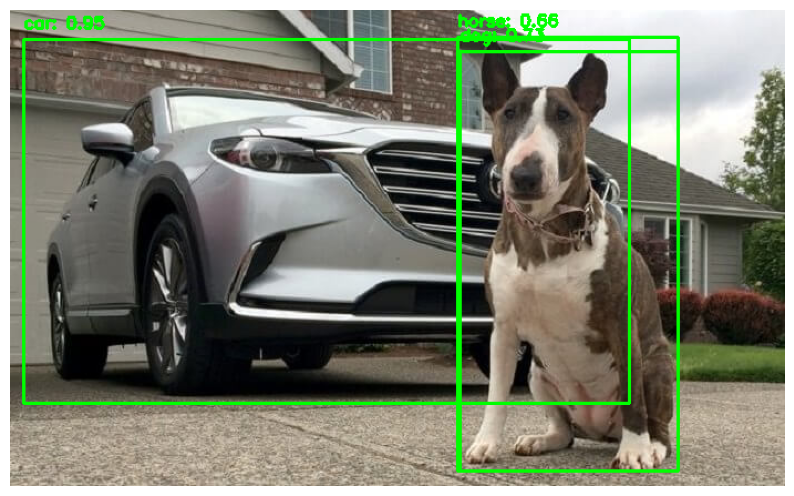

In [ ]:
# Install required libraries
# pip install opencv-python-headless numpy matplotlib

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained MobileNet SSD model
prototxt_path = "deploy.prototxt"  # Update with the correct path
model_path = "mobilenet_iter_73000.caffemodel"  # Update with the correct path
net = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)

# Load the COCO class labels
class_labels = ["background", "aeroplane", "bicycle", "bird", "boat",
                "bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
                "dog", "horse", "motorbike", "person", "pottedplant",
                "sheep", "sofa", "train", "tvmonitor"]

# Load the image
img_path = 'b.jpg'  # Update with your image path
img = cv2.imread(img_path)
h, w = img.shape[:2]

# Preprocess the image
blob = cv2.dnn.blobFromImage(img, scalefactor=0.007843, size=(300, 300), mean=127.5)
net.setInput(blob)
detections = net.forward()

# Draw bounding boxes for detected objects
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > 0.4:  # Confidence threshold
        class_id = int(detections[0, 0, i, 1])
        class_name = class_labels[class_id]

        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

        # Draw bounding box and label
        cv2.rectangle(img, (startX, startY), (endX, endY), (0, 255, 0), 2)
        label = f"{class_name}: {confidence:.2f}"
        cv2.putText(img, label, (startX, startY - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Convert BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Show the output image
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.axis("off")
plt.show()

In [ ]:
import urllib.request
import socket

socket.setdefaulttimeout(30)  # Set timeout to 30 seconds

# URLs for YOLOv3 files
urls = {
    "yolov3.cfg": "https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg",
    "coco.names": "https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names"
}

# Download each file
for filename, url in urls.items():
    print(f"Downloading {filename}...")
    try:
        urllib.request.urlretrieve(url, filename)  # Apply timeout here
        print(f"{filename} downloaded successfully!")
    except (socket.timeout, urllib.error.URLError) as e:
        print(f"Error downloading {filename}: {e}")

print("All files downloaded!")

yolov3.cfg downloaded successfully!
coco.names downloaded successfully!
All files downloaded!


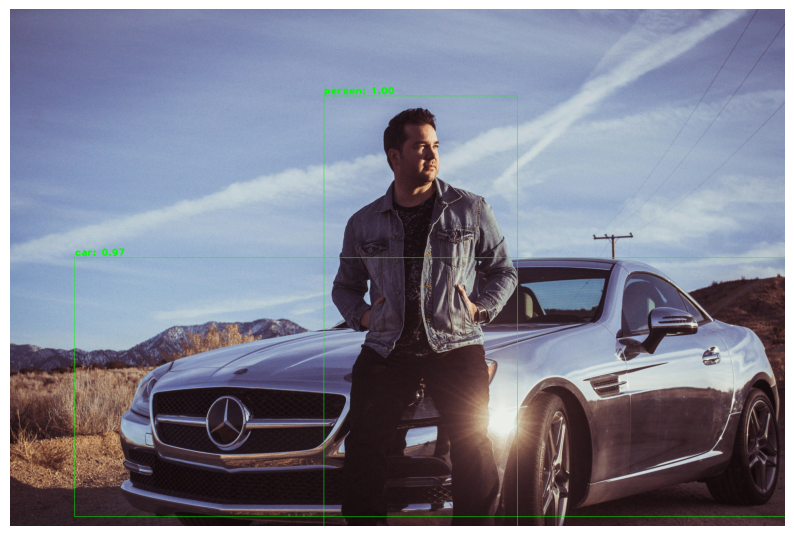

Detected objects:
person: 1.00
car: 0.97


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Paths to YOLOv3 model files (make sure the paths are correct)
yolo_cfg = "yolov3.cfg"  # Path to YOLOv3 config file
yolo_weights = "yolov3.weights"  # Path to YOLOv3 trained weights
yolo_names = "coco.names"  # Path to COCO class names file

# Load YOLO model
net = cv2.dnn.readNetFromDarknet(yolo_cfg, yolo_weights)

# Load COCO class labels
with open(yolo_names, "r") as f:
    class_labels = f.read().strip().split("\n")

# Load the image
img_path = "men.jpg"  # Update with your image path
img = cv2.imread(img_path)
h, w = img.shape[:2]

# Convert image to YOLO format
blob = cv2.dnn.blobFromImage(img, scalefactor=1/255.0, size=(416, 416), swapRB=True, crop=False)
net.setInput(blob)

# Get output layer names
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers().flatten()]

# Run forward pass
detections = net.forward(output_layers)

# Process YOLO detections
boxes, confidences, class_ids = [], [], []
for output in detections:
    for detection in output:
        scores = detection[5:]  # Class probabilities
        class_id = np.argmax(scores)  # Get class with highest probability
        confidence = scores[class_id]

        if confidence > 0.4:  # Confidence threshold
            # Scale bounding box coordinates
            box = detection[0:4] * np.array([w, h, w, h])
            (centerX, centerY, width, height) = box.astype("int")
            startX = int(centerX - width / 2)
            startY = int(centerY - height / 2)

            boxes.append([startX, startY, int(width), int(height)])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Apply Non-Maximum Suppression (NMS) to remove redundant overlapping boxes
indices = cv2.dnn.NMSBoxes(boxes, confidences, score_threshold=0.4, nms_threshold=0.3)

# Draw bounding boxes and labels
detected_objects = []  # List to store detected objects
if len(indices) > 0:
    for i in indices.flatten():
        (x, y, w, h) = boxes[i]
        label = f"{class_labels[class_ids[i]]}: {confidences[i]:.2f}"
        detected_objects.append(label)  # Append object label to the list
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(img, label, (x, y - 10), cv2.FONT_HERSHEY_PLAIN, 6, (0, 255, 0), 12)
else:
    print("No objects detected.")

# Convert BGR to RGB for displaying
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Show the output image
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.axis("off")
plt.show()

# Print detected objects
print("Detected objects:")
for obj in detected_objects:
    print(obj)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')